### 이미지 생성, 복사, 부분 이미지 추출

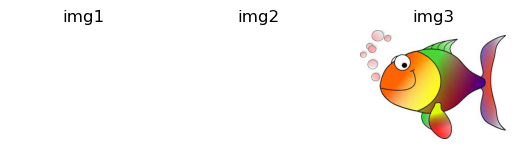

In [9]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('HappyFish.jpg')
img2 = img1
img3 = img1.copy()
# print("id 비교 : ", id(img1), id(img2), id(img3))

img1.fill(255)

# cv2.imshow('img1', img1) # 흰색
# cv2.imshow('img2', img2) # 흰색
# cv2.imshow('img3', img3) # 물고기이미지
# cv2.waitKey()
# cv2.destroyAllWindows()

plt.subplot(131)
plt.title('img1')
plt.axis('off')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.title('img2')
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(133)
plt.title('img3')
plt.axis('off')
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

(<Axes: title={'center': 'img3'}>,
 Text(0.5, 1.0, 'img3'),
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x1b9d21672f0>)

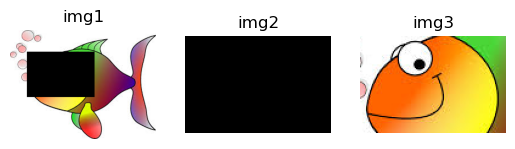

In [ ]:
img1 = cv2.imread('HappyFish.jpg')
img2 = img1[40:120, 30:150] # 복사가 아닌 참조를 했기 때문에 img1에 영향이 가는거임
img3 = img1[40:120, 30:150].copy()

img2.fill(0)

plt.subplot(131), plt.title('img1'), plt.axis('off'), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(132), plt.title('img2'), plt.axis('off'), plt.imshow(img2)
plt.subplot(133), plt.title('img3'), plt.axis('off'), plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))


### 마스크 연산과 ROI
- ROI : 관심영역, 영상에서 특정 연산을 수행하고자 하는 임의의 부분 영역
- 마스크 연산 : OpenCV는 일부 함수에 대해 ROI 연산을 지원하며, 이때 마스크 영상을 인자로 함께 전달해야함, 그레이스케일

- cv2.copyTo(src, mask, dst) -> dst
- - src : 입력 영상
- - mask : 마스크 영상
- - dst : 출력 영상, 만약 src와 크기 및 타입이 같은 dst를 입력으로 지정하면 dst를 새로 생성하지 않고 연산을 수행. 그렇지 않으면 dst를 새로 생성하여 연산을 수행한 후 반환

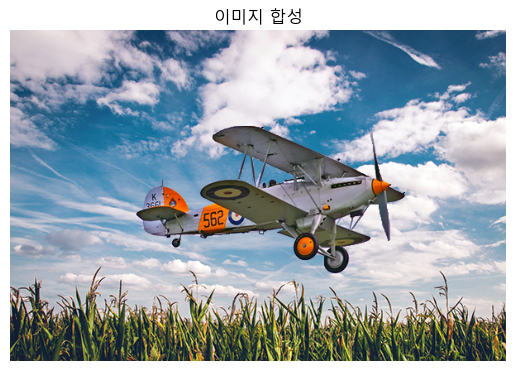

In [25]:
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
# 이미지 합성

src = cv2.imread('airplane.bmp', cv2.IMREAD_COLOR)
mask = cv2.imread('mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.imread('field.bmp', cv2.IMREAD_COLOR)

cv2.copyTo(src, mask, dst)
# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

plt.title('이미지 합성')
plt.axis('off')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

- 채널 : 이미지는 단순한 픽셀 모음, 각 픽셀은 색상 정보를 여러개로 나눠서 가짐. 이때 각각의 색상 성분을 채널이라고 함.
- - 흑백 이미지 = 1채널, 컬러 이미지 = 3채널, 투명도 포함 이미지 = 4채널

- IMREAD_UNCHANGED : 알파(투명도) 채널 까지 포함한 4채널로 읽어옴

#### cv2.copyTo()
- cv2.copyTo(logo2, mask, crop)
- mask가 0이 아닌 부분만 logo2의 픽셀을 crop에 복사
즉, mask가 255인 부분은 logo2에서 가져오고 mask가 0이면 원래 src 그대로 놔둠
결과적으로 logo의 투명하지 않은 부분만 src 위에 붙는 효가가 남.

(<Axes: title={'center': 'mask'}>,
 Text(0.5, 1.0, 'mask'),
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x1b9d4e74410>)

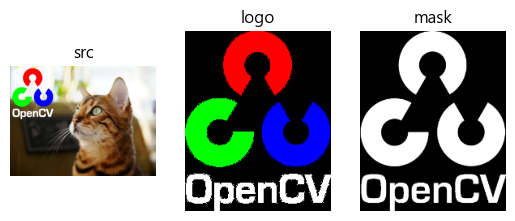

In [27]:
import cv2
import sys

# 알파 채널을 마스크 영상으로 이용
src = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)
logo = cv2.imread('opencv-logo-white.png', cv2.IMREAD_UNCHANGED)

if src is None or logo is None:
    print('Image load failed')
    sys.exit()
    
mask = logo[:, :, 3] # mask는 알파 채널로 만든 마스크 영상
logo2 = logo[:, :, :-1] # logo는 b, g, r 3채널로 구성된 컬러 영상
h, w = mask.shape[:2]
crop = src[10:10+h, 10:10+w] # logo, mask와 같은 크기의 부분 영상 추출

cv2.copyTo(logo2, mask, crop)

plt.subplot(131), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_RGB2BGR))
plt.subplot(132), plt.title('logo'), plt.axis('off'), plt.imshow(cv2.cvtColor(logo, cv2.COLOR_RGB2BGR))
plt.subplot(133), plt.title('mask'), plt.axis('off'), plt.imshow(mask, cmap='gray')


### 카메라와 동영상 처리하기


In [ ]:
import sys
import cv2

cap = cv2.VideoCapture(0) # 기본 카메라 장치 열기

if not cap.isOpened():
    print("Camera open failed")
    exit()

while True:
    ret, frame = cap.read() # 카메라로부터 프레임을 정상적으로 받아오면 ret에는 True, frame에는 해당 프레임이 저장됨.count
    
    if not ret:
        break
    
    # frame은 BGR -> 그냥띄우면 괜찮음 반전되면 색이 이상해 보임
    inversed = ~frame # 현재 프레임 반전
    
    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)
    
    if cv2.waitKey(10) == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2

cap = cv2.VideoCapture('video1.mp4')

fps = round(cap.get(cv2.CAP_PROP_FPS))
print(fps)
delay = round(1000 / fps)

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('can\'t read video capture')
        break
    
    inversed = ~frame
    
    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)
    
    if cv2.waitKey(delay) == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

24
can't read video capture


In [1]:
import cv2

cap = cv2.VideoCapture(0)

w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'DIVX') # *'DIVS' == 'D', 'I', 'V', 'X'
out = cv2.VideoWriter('output.avi', fourcc, 30, (w,h))

while True:
    ret, frame = cap.read()
    if not ret:
        print("can't read video capture")
        break
    
    inversed = ~frame
    out.write(inversed)
    
    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)
    if cv2.waitKey(10) == 27:
        break
    
cv2.destroyAllWindows()

### [실전 코딩] 동영상 전환 이펙트

In [ ]:
import sys
import numpy as np
import cv2

# 두 개의 동영상을 열어서 cap1, cap2로 지정
cap1 = cv2.VideoCapture('video1.mp4')
cap2 = cv2.VideoCapture('video2.mp4')

if not cap1.isOpened() or not cap2.isOpened():
    print('video open falied')
    sys.exit()
    
# fps는 같다고 가정 fps2 필요없어짐
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT)) # 3*24 = 72
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT)) # 5*24 = 100
fps1 = cap1.get(cv2.CAP_PROP_FPS) # 24
fps2 = cap2.get(cv2.CAP_PROP_FPS)
effect_frames = int(fps1 * 2) # 24*2 = 48

print(f'frame_cnt1 : {frame_cnt1}, fps1 : {fps1}')
print(f'frame_cnt2 : {frame_cnt2}, fps2 : {fps2}')

delay1 = int(1000 / fps1)
delay2 = int(1000 / fps2)

w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH)) # 1280
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT)) # 720
# fourcc : 코덱?
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

# 출력 동영상 객체 생성
out = cv2.VideoWriter('quiz2.avi', fourcc, fps1, (w,h))

# 1번 동영상 복사
for i in range(frame_cnt1 - effect_frames):
    ret1, frame1 = cap1.read()
    
    if not ret1:
        print("can't read video capture")
        sys.exit()
        
    out.write(frame1)
    print('.', end="")
    
    cv2.imshow('quiz2', frame1)
    cv2. waitKey(delay1)
    
# 1번 동영상 뒷부분과 2번 동영상 앞부분을 합성
for i in range(effect_frames):
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()
    
    if not ret2:
        print("can't read video capture")
        sys.exit()
        
    dx = int(w / effect_frames) * i # 0 -> w 까지
    frame = np.zeros((h,w,3), np.uint8)
    frame[:, 0:dx, :] = frame2[:, 0:dx, :]
    frame[:, dx:w, :] = frame1[:, dx:w, :]
    
    out.write(frame)
    print('.', end="")
    
    cv2.imshow('quiz2', frame)
    cv2.waitKey(delay1)
    
    
# 2번 동영상 복사
for i in range(effect_frames, frame_cnt2):
    ret2, frame2 = cap2.read()
    
    if not ret2:
        print("can't read video2 capture")
        sys.exit()
        
    out.write(frame2)
    print('.', end="")
    
    cv2.imshow('quiz2', frame2)
    cv2.waitKey(delay2)

print()
print('완료')

cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()

frame_cnt1 : 85, fps1 : 24.0
frame_cnt2 : 121, fps2 : 24.0
..............................................................................................................................................................
완료
